In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
import math
from itertools import permutations


font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

sns.set(style="white")
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":14})  
graphicfolder = '../plot_individual'
os.makedirs(graphicfolder, exist_ok=True)
colorvaris = {
    'base':'#000000',
    'R':'#f37354',
    'P':"#3BC0CF",
    'S':'#0e6da1',
    'geo':'#F4B44B',
    'grey':'#d1d3d4'
             }
daynightcolor = ["#31C0D0","#023F5D"]
sns.set_palette(sns.color_palette(daynightcolor))
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'

In [20]:
datafolder = "./data"
dfall = pd.read_csv(f"{datafolder}/_public_sharing/individual_mixing.csv")
dfall['year'] = dfall['year'].astype(int).astype(str)
dfcomp = pd.read_csv(f"{datafolder}/individual_mixing_for_comp.csv")
dfcomp['year'] = dfcomp['year'].astype(int).astype(str)
resi_mix = pd.read_csv(f"{datafolder}/residential_mixing.csv")
resi_mix['year']  = resi_mix['year'].astype(int).astype(str)

In [21]:
viz = dfall[dfall["leg_unique"]>1]
comp_visit = viz[["personID","mix_individual","year","age_group_des","AGEdes",'leg_unique',
              "age", "sex","homeTPUSB","income_q",'within_station']].drop_duplicates(["personID","year"])\
.merge(resi_mix[["homeTPUSB","year","mix_resi"]], 
       on=["homeTPUSB","year"], how = 'inner')

comp_visit = pd.wide_to_long(comp_visit,
                stubnames='mix', 
                i = ["personID",
                "income_q",
                "AGEdes",
                "age_group_des",
              "age", "sex","homeTPUSB","year"], 
                j = "type",
               sep='_',
                suffix=r'\w+').reset_index()
comp_visit.head()

,personID,income_q,AGEdes,age_group_des,age,sex,homeTPUSB,year,type,within_station,leg_unique,mix
0,200730300,3,4-7,0-10,2.0,F,255001,2011,individual,1.0,5,0.687845
1,200730300,3,4-7,0-10,2.0,F,255001,2011,resi,1.0,5,0.504631
2,307500300,2,4-7,0-10,2.0,M,255001,2011,individual,1.0,5,0.938486
3,307500300,2,4-7,0-10,2.0,M,255001,2011,resi,1.0,5,0.504631
4,307390400,2,4-7,0-10,2.0,M,255001,2011,individual,1.0,5,0.906871


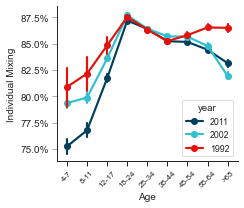

In [8]:
color_3y = [ '#023F5D','#31C0D0',"#E3120B",]
sns.set_palette(sns.color_palette(color_3y))
fig, ax = plt.subplots(figsize = (3.5,3))
sns.pointplot(
    x = "AGEdes",
    y = "mix_individual",
    hue = "year",
    order = ['4-7', 
             '8-11', 
             '12-17', 
             '18-24', 
             '25-34', 
             '35-44', 
             '45-54',
       '55-64', 
             '>65'],
    data = viz,
)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(axis='x', labelsize= 8, rotation=45
              )
ax.tick_params(axis='y', labelsize= 10, color = 'darkgrey'
                  )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_ylabel("Individual Mixing", size = 10)

ax.set_xlabel("Age", size = 10)

plt.tight_layout()


# plt.savefig(os.path.join(graphicfolder, 'ThreeYearAge.svg'),
#                           dpi=200,bbox_inches='tight')

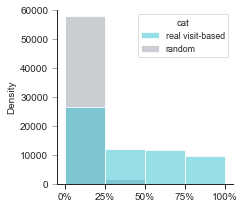

In [13]:
colorpairs = ['#31C0D0',"#979ea8"]
sns.set_palette(sns.color_palette(['#31C0D0',"#979ea8"]))

def plot_dist_comp(df_comp, 
                   x, 
                   hue,
                   y_max,
                   bin = 100,
                   filename = "%Time Spent At Places Different from One's own Income Group",
                   plotmean = False):
    fig, ax = plt.subplots(figsize = (3.5,3))
    sns.histplot(
        data = df_comp,
        x = x,
        hue = hue,
        bins = bin,
        kde=False
    )

    # add a line showing mean value of the distribution
    vs = df_comp[hue].unique()
    if plotmean:
        ax.axvline(df_comp[df_comp[hue] == vs[0]][x].mean(), color=colorpairs[0], linestyle='dashed', linewidth=1)
        ax.axvline(df_comp[df_comp[hue] == vs[1]][x].mean(), color=colorpairs[1], linestyle='dashed', linewidth=1)

    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.tick_params(axis='x', labelsize= 10
                  )
    ax.tick_params(axis='y', labelsize= 10, color = 'darkgrey'
                      )
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax.set_ylabel("Density", size = 10)

    ax.set_xlabel("", size = 10)
    plt.ylim([0, y_max])
    plt.tight_layout()
    fig.savefig(os.path.join(graphicfolder, filename+".svg"), dpi = 300)

sns.set_palette(sns.color_palette(['#31C0D0',"#979ea8"]))
year = '2011'
plot_dist_comp(dfcomp[(dfcomp["year"]==year)&(dfcomp["leg_unique"]>1)], 
               "explore_per", 
               "cat",
               60000,
               bin = 4,
               filename = f"explore_per_{year}_loose"
)

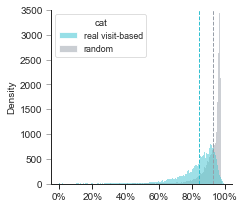

In [14]:

plot_dist_comp(dfcomp[(dfcomp["year"]==year)&(dfcomp["leg_unique"]>1)], 
               "mix_individual",
               "cat", 
               3500,
               bin = 500,
               filename = f"Individual Social Mixing (Day-visit){year}",
               plotmean = True)

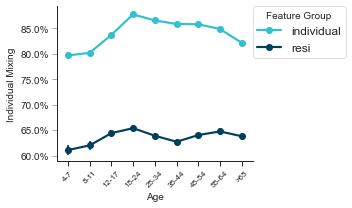

In [24]:
def get_age(comp_visit, filename = 'Individual_mixing_age_group_visit'):
    """This plot a single year"""
    daynightcolor = ["#31C0D0","#023F5D"]
    sns.set_palette(sns.color_palette(daynightcolor))
    fig, ax = plt.subplots(figsize = (5,3))
    sns.pointplot(
        x = "AGEdes",
        y = "mix",
        hue = "type",
        order = ['4-7', 
             '8-11', 
             '12-17', 
             '18-24', 
             '25-34', 
             '35-44', 
             '45-54',
       '55-64', 
             '>65'],
        data = comp_visit,
    )
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')



    ax.tick_params(axis='x', labelsize= 8, rotation=45
                  )
    ax.tick_params(axis='y', labelsize= 10, color = 'darkgrey'
                      )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax.set_ylabel("Individual Mixing", size = 10)

    ax.set_xlabel("Age", size = 10)

    plt.tight_layout()
    plt.legend(title="Feature Group",
               bbox_to_anchor=(1, 1), 
               loc='upper left', 
               borderaxespad=0, fontsize = 'large', title_fontsize = 10)

    # plt.savefig(os.path.join(graphicfolder, filename+'.svg'),
    #                           dpi=200,bbox_inches='tight')
get_age(comp_visit[comp_visit["year"]=='2002'], filename = 'Individual_mixing_age_group_visit')